<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывел-данные" data-toc-modified-id="Вывел-данные-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывел данные</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Портрет-пользователя-каждого-региона" data-toc-modified-id="Портрет-пользователя-каждого-региона-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Портрет пользователя каждого региона</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

#  Планирование рекламной кампании
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Изучение данных из файла

In [1]:
import pandas as pd
import math as mt
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
df=pd.read_csv('/datasets/games.csv')

### Вывел данные

In [2]:
display(df)
df.info()
display(df.head())
display(df.tail())
display(df.describe().T)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


На первый взгляд видно, что много данных пропущено. Это может быть связано с годом выхода(не успели еще оценить, слишком давно вышли), может быть связано с платформой( не особо популярная).

## Предобработка данных

In [3]:
df.columns=df.columns.str.lower()

Перевел название столбцов в нижний регистр

In [4]:
df = df[df['name'].notna()]

Удалил строки без название игры

In [5]:
df['platform'].value_counts().head(20)


PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
Name: platform, dtype: int64

Количество игр по платформам

In [6]:
df.query('critic_score.isna() and year_of_release =="2010"')['platform'].value_counts()

DS      267
Wii     176
PSP     145
PS3      55
X360     46
PS2      37
PC       29
Name: platform, dtype: int64

In [7]:
df.loc[df['user_score']== 'tbd', 'user_score'] = np.nan
df['user_score']=df['user_score'].astype('float64')
df = df[df['year_of_release'].notna()]
df['year_of_release']=pd.to_datetime(df['year_of_release'], format='%Y')
df['rating'] = df['rating'].fillna(df.groupby('name')['rating'].transform('first'))


In [8]:
# КОД РЕВЬЮВЕРА

df.rating.isnull().sum()

6259

In [9]:
df.rating = df.rating.fillna('undefined')

In [10]:
df.rating.isnull().sum()

0

Заменил tbd на NaN, для того, чтобы перевести столбец в float. Удалил нули из дат и переделал в формат даты. Заполнил пропуски отзывов критиков по медиане исходя из название игры( если есть повторяющиеся имена игр для разных платформ) 

In [11]:
df['sum_sales']=df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']
display(df)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16711,LMA Manager 2007,X360,2006-01-01,Sports,0.00,0.01,0.00,0.00,NaN,NaN,undefined,0.01
16712,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16713,Spirits & Spells,GBA,2003-01-01,Platform,0.01,0.00,0.00,0.00,NaN,NaN,undefined,0.01


Добавил столбец с суммой продаж

## Исследовательский анализ данных

In [12]:
(
    df.pivot_table(index='platform', values=['name','year_of_release'], 
               aggfunc={'name' :'count','year_of_release':'last'})
.sort_values('name',ascending = False)
)

,name,year_of_release
platform,,
PS2,2127,2008-01-01
DS,2121,2008-01-01
PS3,1306,2016-01-01
Wii,1286,2008-01-01
X360,1232,2006-01-01
PSP,1193,2007-01-01
PS,1190,1995-01-01
PC,957,2009-01-01
GBA,811,2003-01-01


Количество продаж по годам и платформам

In [13]:
display(df.isna().any())
display(df.isna().sum())
df.query('year_of_release.isna()')['name'].value_counts().head(20)

name               False
platform           False
year_of_release    False
genre              False
na_sales           False
eu_sales           False
jp_sales           False
other_sales        False
critic_score        True
user_score          True
rating             False
sum_sales          False
dtype: bool

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
sum_sales             0
dtype: int64

Series([], Name: name, dtype: int64)

In [14]:
display(df.isna().any())
display(df.isna().sum())

name               False
platform           False
year_of_release    False
genre              False
na_sales           False
eu_sales           False
jp_sales           False
other_sales        False
critic_score        True
user_score          True
rating             False
sum_sales          False
dtype: bool

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
sum_sales             0
dtype: int64

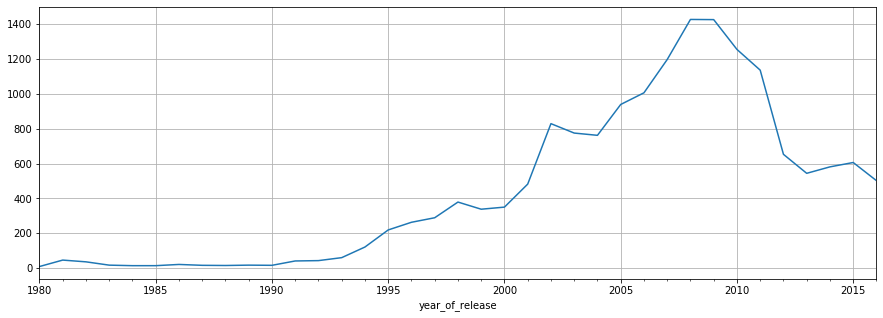

In [15]:
display(df.groupby('year_of_release').count().sort_values('year_of_release')['name'].plot(grid=True, figsize=(15,5)))
df=df.query('year_of_release>=2000')

Изменение продаж по платформам. С 2000 года идет резки спрос на видео игры, соответственно данные раньше 2000 года не важны.
Мы видим, что до 94-95 игр выпускалось крайне мало, вероятно индустрия только зарождалась. Скачок произошел с 2001-2002 и длился до пика 2008-2009 года, после чего количество выпускаемых игр пошло на спад, полагаю это может быть связано с разивтием мобильной индустрии, увеличением времени и средств на разработку игр

In [16]:
(
    df.pivot_table(index=['platform','year_of_release'], values='sum_sales', aggfunc='sum')
     .sort_values(['platform','year_of_release'],ascending=True)
)

sum_sales
platform year_of_release           
3DS      2011-01-01           63.20
         2012-01-01           51.36
         2013-01-01           56.57
         2014-01-01           43.76
         2015-01-01           27.78
...                             ...
XB       2008-01-01            0.18
XOne     2013-01-01           18.96
         2014-01-01           54.07
         2015-01-01           60.14
         2016-01-01           26.15

[150 rows x 1 columns]

Распределение суммы продаж по платформам и годам

In [17]:
df_top = df.groupby('platform').sum().sort_values('sum_sales',ascending=False)
df_top

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
platform,,,,,,,
PS2,572.92,332.63,137.54,190.47,87611.0,9302.9,1233.56
X360,595.74,268.32,12.30,84.88,61405.0,6313.3,961.24
PS3,390.13,327.21,79.41,134.59,56657.0,5785.5,931.34
Wii,486.87,258.32,68.28,77.71,35658.0,3692.4,891.18
DS,380.31,188.41,175.00,59.04,45120.0,3595.6,802.76
PS4,108.74,141.09,15.96,48.35,18167.0,1734.3,314.14
GBA,184.12,74.59,46.56,7.61,28944.0,1925.0,312.88
PSP,107.27,65.62,75.88,40.76,30796.0,3025.0,289.53
3DS,82.65,61.27,100.62,13.27,11148.0,1171.7,257.81


In [18]:
(
    df.pivot_table(index=['platform'], values='sum_sales', aggfunc='sum')
     .sort_values(['sum_sales'],ascending=False).head(5)
)


,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76


Платформы с наибольшими продажами начиная с 2000 года

In [19]:
(
    df.pivot_table(index=['platform','year_of_release'], values='sum_sales', aggfunc='sum')
     .sort_values(['sum_sales','platform'],ascending=False).head(50)
#     .query('platform in ("PS2","X360","PS3","Wii","DS")')
)

sum_sales
platform year_of_release           
PS2      2004-01-01          211.81
Wii      2009-01-01          206.97
PS2      2002-01-01          205.38
         2003-01-01          184.31
Wii      2008-01-01          171.32
X360     2010-01-01          170.03
PS2      2001-01-01          166.43
         2005-01-01          160.66
PS3      2011-01-01          156.78
Wii      2007-01-01          152.77
DS       2007-01-01          146.94
         2008-01-01          145.31
X360     2011-01-01          143.84
PS3      2010-01-01          142.17
Wii      2006-01-01          137.15
X360     2008-01-01          135.26
PS3      2009-01-01          130.93
DS       2005-01-01          130.14
Wii      2010-01-01          127.95
X360     2009-01-01          120.29
DS       2006-01-01          119.81
         2009-01-01          119.54
PS4      2015-01-01          118.90
PS3      2008-01-01          118.52
         2013-01-01          113.25
         2012-01-01          107.36
PS2      2006-01-01          103.42
PS4      2014-01-01          100.00
X360     2012-01-01           99.74
PS       2000-01-01           96.37
X360     2007-01-01           95.41
         2013-01-01           88.58
DS       2010-01-01           85.02
GBA      2004-01-01           77.91
PS2      2007-01-01           75.99
GBA      2002-01-01           74.16
PS3      2007-01-01           73.19
PS4      2016-01-01           69.25
XB       2004-01-01           65.42
3DS      2011-01-01           63.20
GBA      2001-01-01           61.53
XOne     2015-01-01           60.14
Wii      2011-01-01           59.65
GBA      2003-01-01           56.67
3DS      2013-01-01           56.57
PSP      2006-01-01           55.32
XB       2003-01-01           55.04
XOne     2014-01-01           54.07
PS2      2008-01-01           53.90
GC       2002-01-01           51.81

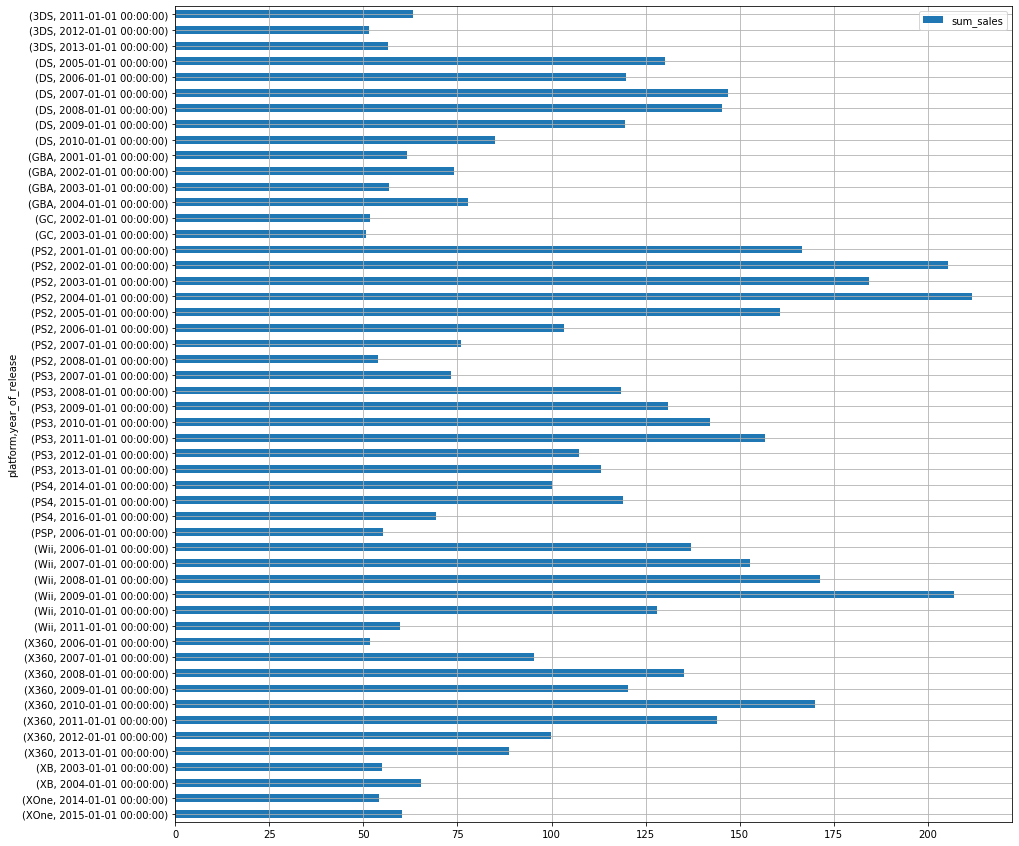

In [20]:
(
    df.pivot_table(index=['platform','year_of_release'], values='sum_sales', aggfunc='sum')
     .sort_values(['platform','year_of_release','sum_sales'],ascending=False)
       .query('sum_sales > 50 and year_of_release > 2000')
).plot(kind='barh',grid=True,figsize=(15,15))
plt.show()

Жизненный цикл платформы примерно 5 лет.

In [22]:
df_actual = df.query('year_of_release >= 2013')
df_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013-01-01,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013-01-01,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,undefined,14.63
33,Pokemon X/Pokemon Y,3DS,2013-01-01,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,undefined,14.60
42,Grand Theft Auto V,PS4,2014-01-01,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16707,Aiyoku no Eustia,PSV,2014-01-01,Misc,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16712,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01


df.rating.isnull().sum()

Взял выборку начиная с 2010 года

In [23]:
(
    df_actual.pivot_table(index=['platform'], values='sum_sales', aggfunc='sum')
     .sort_values(['sum_sales'],ascending=False)
       
)

,sum_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


По платформам лидирует PS3 X360 PS4 3DS

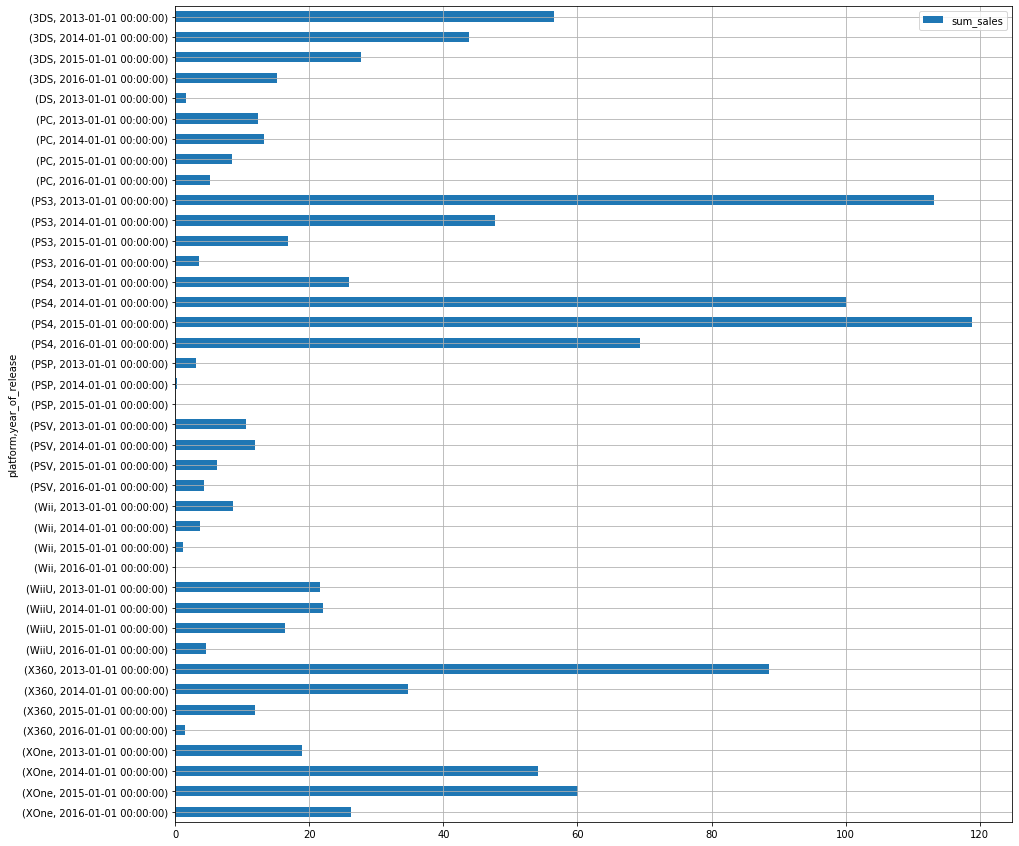

In [24]:
(
    df_actual.pivot_table(index=['platform','year_of_release'], values='sum_sales', aggfunc='sum')
     .sort_values(['platform','year_of_release'],ascending=False)
       
).plot(kind='barh',grid=True,figsize=(15,15))

Продажи всех платформ доходят до пика и потом начинают падать к 2016 году

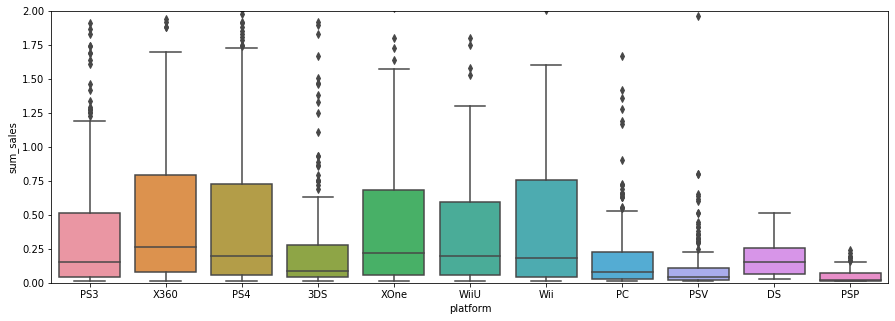

In [25]:
plt.figure(figsize=(15,5))
sns.boxplot(x='platform', y='sum_sales', data = df_actual)
plt.ylim(0,2)
plt.show()

Из табилцы видно, что суммарные продажи у PS3, но на графике видно, что больше всех продаж по годам у X360

In [26]:
(
    df_actual.query('platform=="X360"')
    .pivot_table(index=['platform','critic_score','user_score'], values='sum_sales', aggfunc='sum')   
)

sum_sales
platform critic_score user_score           
X360     19.0         1.3              0.06
         32.0         3.8              0.08
                      4.0              0.62
         33.0         6.2              0.39
         35.0         5.8              0.04
...                                     ...
         87.0         6.6              1.41
         90.0         8.2              0.43
         91.0         7.9              0.74
         93.0         8.5              1.94
         97.0         8.1             16.27

[80 rows x 1 columns]

Из таблицы видно, что высокий результат критиков влияет на продажи, пользовательный - нет

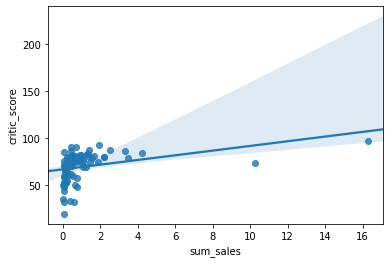

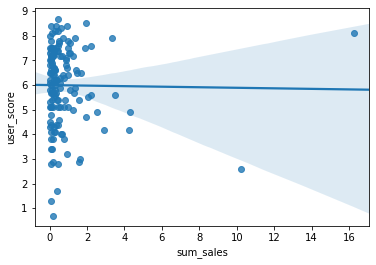

In [27]:
sns.regplot(x='sum_sales',y='critic_score', data=df_actual.query('platform=="X360"'))
plt.show()
sns.regplot(x='sum_sales',y='user_score', data=df_actual.query('platform=="X360"'))
plt.show()

In [28]:
display(df_actual.query('platform=="X360"')['critic_score'].corr(df_actual.query('platform=="X360"')['sum_sales']))

0.3503445460228664

Из корреляции видно, что зависимость оценки критиков от продажи слабая

In [29]:
display(df_actual.query('platform=="X360"')['user_score'].corr(df_actual.query('platform=="X360"')['sum_sales']))

-0.011742185147181342

Из корреляции видно, что зависимость оценки пользователей от продажи близка к нулю

In [30]:
display(df_actual['critic_score'].corr(df_actual['sum_sales']))
display(df_actual['user_score'].corr(df_actual['sum_sales']))

0.3136995151027369

-0.0026078133545982727

In [32]:
df_actual.pivot_table(index='genre',values='name', aggfunc = 'count').sort_values('name',ascending=False)


,name
genre,
Action,766
Role-Playing,292
Adventure,245
Sports,214
Shooter,187
Misc,155
Racing,85
Fighting,80
Platform,74


Самыми популярными являются игры жанры "Action"

In [33]:
df_actual.pivot_table(index='genre',values='sum_sales', aggfunc = 'sum').sort_values('sum_sales',ascending=False)

,sum_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


"Action" так же являются и самыми продаваемыми

## Портрет пользователя каждого региона


In [34]:
display(df_actual.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values('na_sales',ascending=False))
display(df_actual.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values('na_sales',ascending=False))
display(df_actual.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values('na_sales',ascending=False))

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20
WiiU,29.21
PC,11.11
Wii,6.56
PSV,5.04


,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49
Platform,18.14
Fighting,15.55
Racing,12.96
Adventure,7.14


,na_sales
rating,
M,172.82
E,81.71
undefined,74.82
E10+,56.38
T,51.98


В Северной Америке, самым популярными платформами являются "X360","PS3","Wii","PS4","XOne". 
Самыми прибильными являются жанры "Action", "Shooter", "Sports", "Misc", "Role-Playing".
Рейтинг влияет на продажи игры, самые продаваемые игры с рейтингом "M"(17+)

In [35]:
display(df_actual.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales',ascending=False))
display(df_actual.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values('eu_sales',ascending=False))
display(df_actual.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values('eu_sales',ascending=False))

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96
PC,25.36
WiiU,19.85
PSV,6.10
Wii,5.93


,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19
Misc,20.04
Platform,15.58
Simulation,10.92
Fighting,8.55


,eu_sales
rating,
M,153.71
E,85.49
undefined,64.15
E10+,45.20
T,43.68


В Европе, самым популярными платформами являются "PS3","X360","PS4","PC","Wii". 
Самыми прибильными являются жанры "Action", "Shooter", "Sports", "Role-Playing", "Misc".
Рейтинг влияет на продажи игры, самые продаваемые игры с рейтингом "M"(17+)

In [36]:
display(df_actual.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales',ascending=False))
display(df_actual.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values('jp_sales',ascending=False))
display(df_actual.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values('jp_sales',ascending=False))

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88
PSP,3.29
X360,0.51
XOne,0.34
Wii,0.05


,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61
Adventure,5.82
Sports,5.41
Platform,4.79
Simulation,4.52


,jp_sales
rating,
undefined,80.97
T,22.84
E,15.98
M,14.72
E10+,6.27


В Японии, самым популярными платформами являются "3DS","PS3","PSP","DS","PSV". 
Самыми прибильными являются жанры "Role-Playing", "Action", "Misc", "Platform", "Adventure".
Рейтинг влияет на продажи игры, самые продаваемые игры с рейтингом "E"(6+)

Жанры для Америки и Европы примерно одинаковые, что нельзя сказать о Японии, тоже самое и с рейтингом.
В Америке и Европе играют на одних и тех же платформах, в Японии совсем другие платформы

## Проверка гипотез

In [37]:
alpha = 0.05

results = st.ttest_ind(df_actual.query('platform=="XOne"').dropna(inplace=False)['user_score'],
                       df_actual.query('platform=="PC"').dropna(inplace=False)['user_score']) 

print('p-значение: ', results.pvalue)

if results.pvalue < alpha :
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение:  0.8118343024377164
Не получилось отвергнуть нулевую гипотезу


Нулиевая гипотиза гласит, что пользовательский рейтинг платформ Xbox One и PC одинаковый
Альтернативная, что разный

Исходя из теста, рейтинг действительное одинаковый

In [38]:
alpha = 0.05

results = st.ttest_ind(df_actual.query('genre=="Action"').dropna(inplace=False)['user_score'],
                       df_actual.query('genre=="Sports"').dropna(inplace=False)['user_score']) 

print('p-значение: ', results.pvalue)

if results.pvalue < alpha :
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение:  5.005396056879947e-10
Отвергаем нулевую гипотезу


Нулиевая гипотиза гласит, что пользовательский рейтинг жанров "Action" и "Sports" одинаковый
Альтернативная, что разный

По результатам теста, рейтинг этих жанров разный

## Вывод

На старте мы получили данные начиная с 1980 года. Данные до 2000 года оказались мало информативными, поэтому я их отсек.
Было много пропусков в рейтингах. Удалил строки, где были пропуски в имени и годах. Самым продаваемыми игры оказались для платформы PS2. Жизненный цикл платформы составил приблизительно 5 лет, после этого платформа начинала терять в продажах.
Определил актуальный период ( с 2010 по 2016 год).
Посмотрел на распределение по платформам за актуальный период. Самой популярной платформой оказалась X360. Зависимость рейтинга критиков от продаж оказалось выше чем пользовательский рейтинг, но все равно не имел прямой зависимости.
Самые продаваемые и популярные игры в жанре "Action".
Жанры для Америки и Европы примерно одинаковые, что нельзя сказать о Японии, тоже самое и с рейтингом.
В Америке и Европе играют на одних и тех же платформах, в Японии совсем другие платформы.
По итогам проверки гипотез, можно сказать, что рейтинг XOne и PC одинаковый, а вот рейтинг игр в жанре "Action" и "Sports" - нет